# **SKKU AI (Spring 2024)**
### Machine Learning Basics II with Scikit-Learn  (Lab 4 for Week 5)

**NOTE**
Some descriptions & codes from the below resources:
1. [Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
2. https://www.askpython.com/python/examples/principal-component-analysis
3. https://devopedia.org/principal-component-analysis
4. https://colab.research.google.com/github/andy6804tw/2021-13th-ironman/blob/main/11.SVM/11.1.SVM(Classification-iris).ipynb#scrollTo=vZLBnRyHxCHK
---


# Setup
First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

##1. Gradient Descent

* Batch Gradient Descent (= Gradient Descent = Full Gradient Descent)
* Stochastic Gradient Descent
* Mini-batch Gradient Descent

### - Recap: Linear regression using the Normal Equation
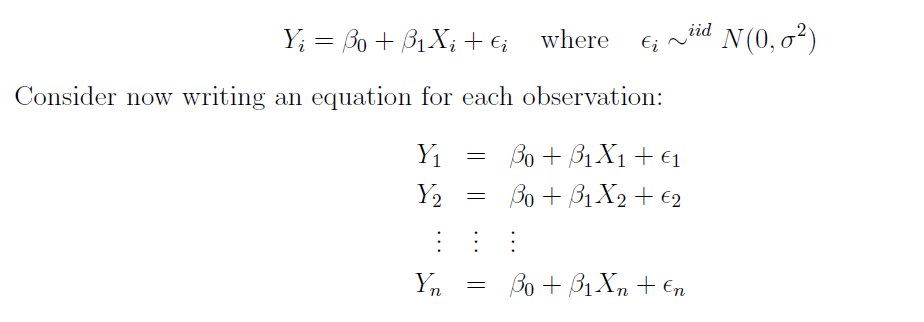

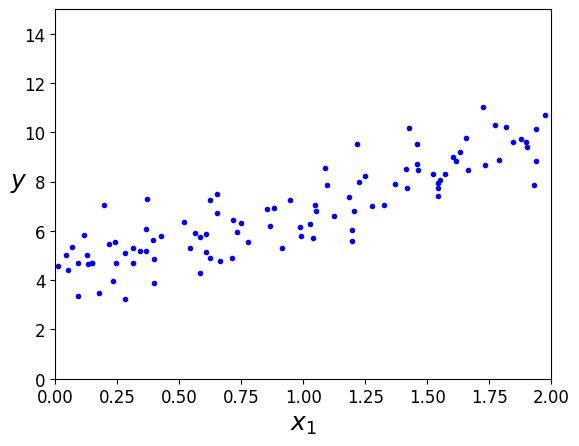

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

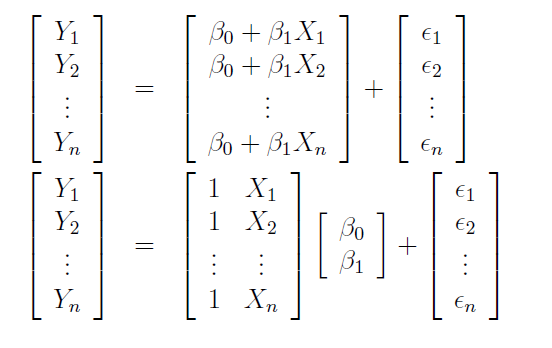

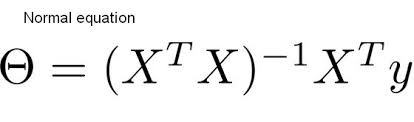

theta_best:
[[4.21509616]
 [2.77011339]]
[[1. 0.]
 [1. 2.]]
y_predict:
[[4.21509616]
 [9.75532293]]


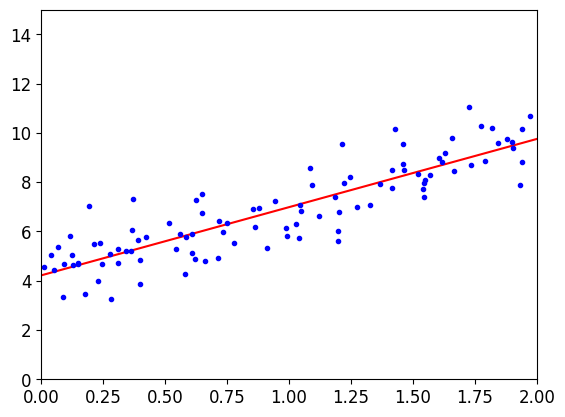

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # normal equation
print (f"theta_best:\n{theta_best}")

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
print(X_new_b)
y_predict = X_new_b.dot(theta_best)

print (f"y_predict:\n{y_predict}")

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Linear regression using batch gradient descent (full gradient descent)

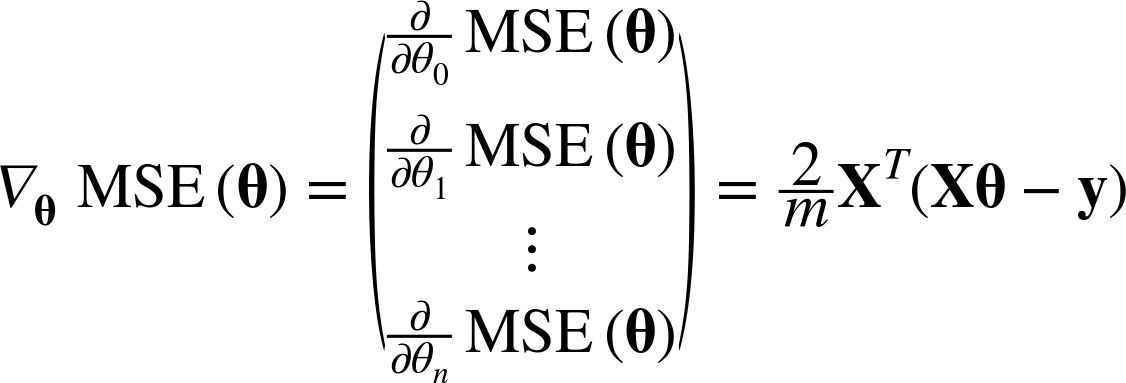

In [ ]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # a gredient vector of the cost function (MSE)
    theta = theta - eta * gradients #gredient descent step
    #print (f"new theta:\n{theta}")

print (f"theta:\n{theta}")

theta:
[[4.21509616]
 [2.77011339]]


In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 5:
            y_predict = X_new_b.dot(theta)
            style = "g-" if iteration > 0 else "r--"
            #print(X_new[1], y_predict[1])
            plt.plot(X_new, y_predict, style)
            plt.text(X_new[0], y_predict[0], str(iteration), fontsize=15, c='g')
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # compute gradient based on the cost function (MSE)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

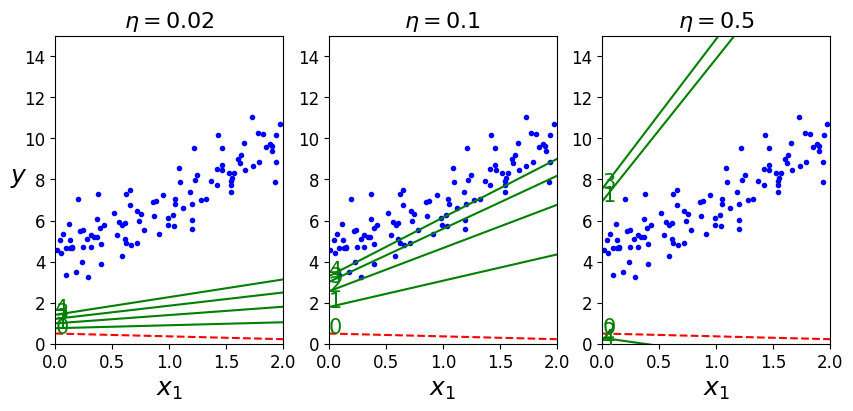

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
#plt.subplot(132); plot_gradient_descent(theta, eta=0.1)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

#save_fig("gradient_descent_plot")
plt.show()

### Linear regression using stochastic gradient descent (using a single sample to compute the gradient)

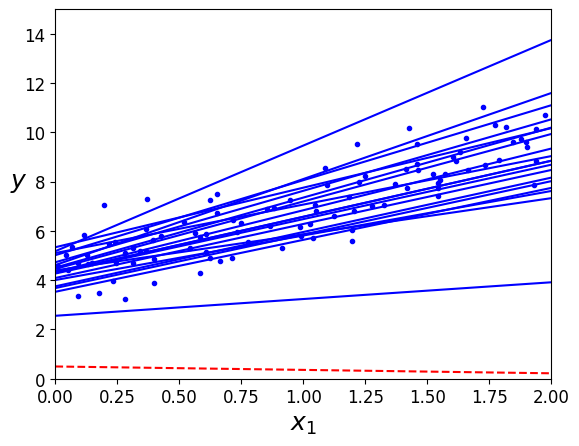

In [ ]:
theta_path_sgd = []
m = len(X_b) #100
#print(m)
np.random.seed(42)

n_epochs = 100
t0, t1 = 15, 50  # learning schedule hyperparameters

# to gradually reduce the learning rate
def learning_schedule(t):
    #return t0 / (t1) #lr = 0.3 (fixed)
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        # pict a random instance in the training set at every steop
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

### Linear regression using mini-batch gradient descent (using some samples to compute the gradient)

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

# check the theta
print (f"theta:\n{theta}")

theta:
[[4.25214635]
 [2.7896408 ]]


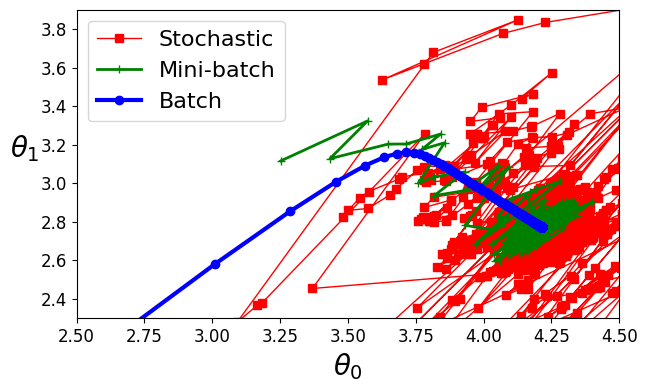

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

##2. Unsupervised Learning

* K-means Clustering
* Principle Components Analysis (PCA)

### K-means Clustering

The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest:
* First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.

First, let's generate some blobs!

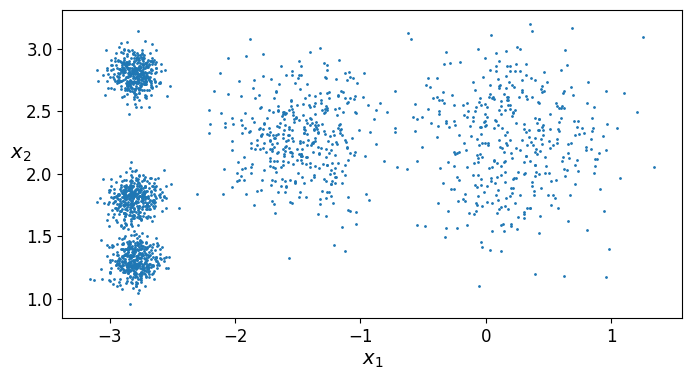

In [ ]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [ ]:
from sklearn.cluster import KMeans

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)


kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

# With default values when K = 5
# The KMeans class applies an optimized algorithm by default.
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

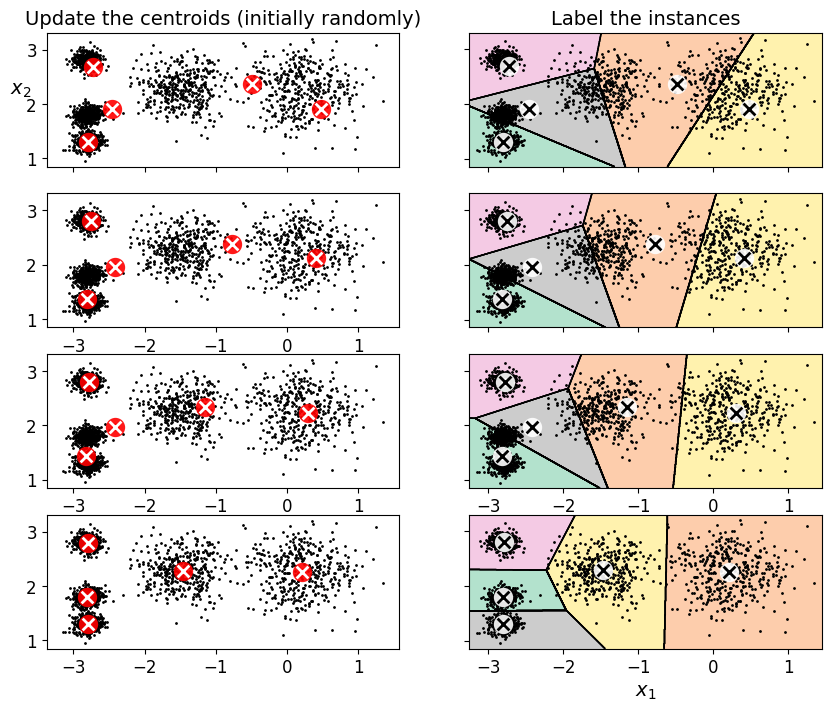

In [ ]:
#######################################
# Some help funtions for plotting
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

#####################################################


plt.figure(figsize=(10, 8))

plt.subplot(421)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(422)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(423)
plot_data(X)
plot_centroids(kmeans_iter2.cluster_centers_, circle_color='r', cross_color='w')

plt.subplot(424)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(425)
plot_data(X)
plot_centroids(kmeans_iter3.cluster_centers_, circle_color='r', cross_color='w')

plt.subplot(426)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.subplot(427)
plot_data(X)
plot_centroids(kmeans.cluster_centers_, circle_color='r', cross_color='w')

plt.subplot(428)
plot_decision_boundaries(kmeans, X, show_ylabels=False)

#save_fig("kmeans_algorithm_plot")
plt.show()

### Principle Components Analysis (PCA)

- PCA is a technique that can be used to simplify a dataset
- It is a linear transformation that chooses a new
coordinate system for the data set such that
greatest variance by any projection of the data
set comes to lie on the first axis (then called the
first principal component),
the second greatest variance on the second axis,
and so on.

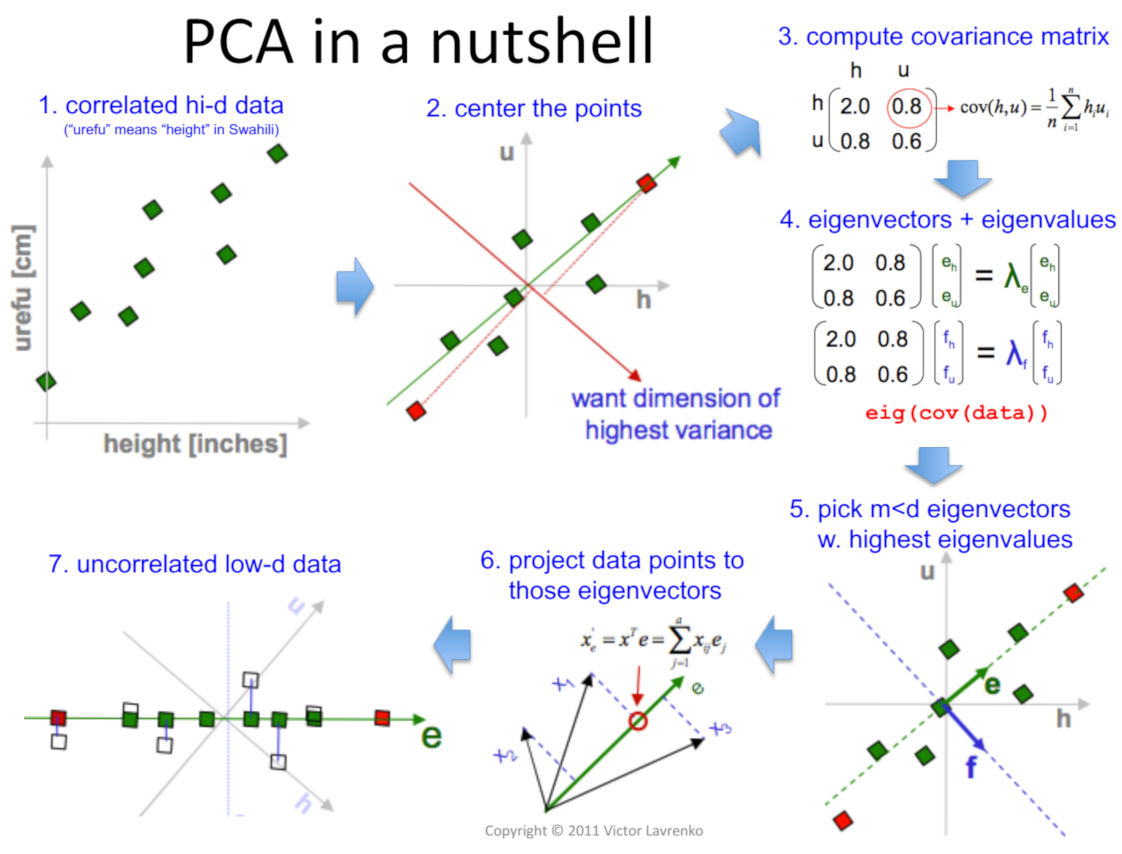

The above PCA image from: http://www.inf.ed.ac.uk/teaching/courses/iaml/2011/slides/pca.pdf

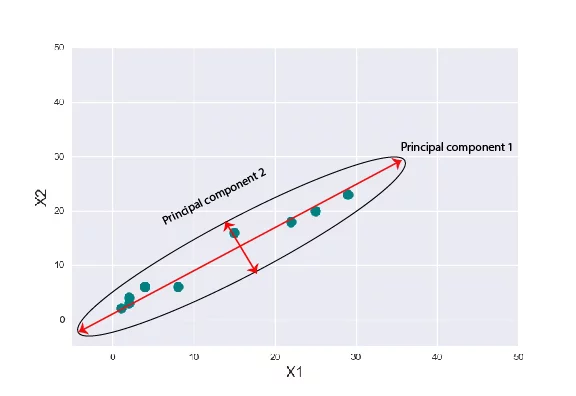

In [ ]:
import numpy as np

def PCA(X , num_components):

    #Step-1
    X_meaned = X - np.mean(X , axis = 0)

    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)

    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1] #ascending
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

    return X_reduced

### Load Iris Dataset
This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

The below plot uses the first two features. See here for more information on this dataset.

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
print(data)

     sepal length  sepal width  petal length  petal width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


### Standardize the Data
StandardScaler helps you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = data.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
#print(x)

# Separating out the target
#y = data.loc[:,['target']].values
#print(y)

#prepare the target
target = data.iloc[:,4]
#print(target)

In [ ]:
import pandas as pd

#Applying it to PCA function
mat_reduced = PCA(x , 2)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

<Axes: xlabel='PC1', ylabel='PC2'>

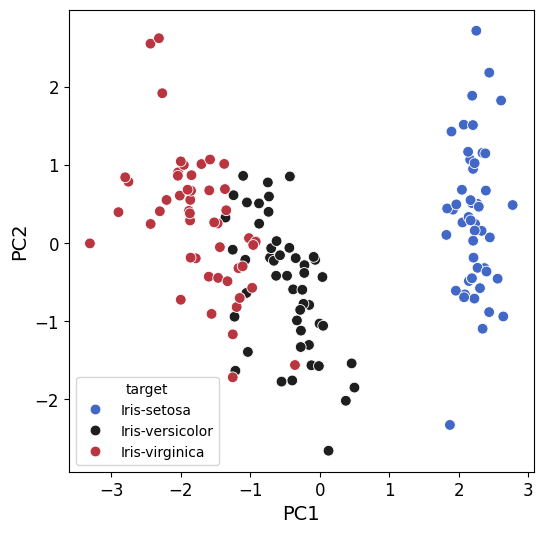

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

##3. Supervised Learning Algorithms

* k-Nearest Neighbor (K-NN)
* Support Vector Machine (SVM)

### k-Nearest Neighbor (K-NN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()

In [ ]:
# Split data into train test sets
from sklearn.model_selection import train_test_split

X, y = iris.data, iris.target

# stratify => to make balanced bins
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, stratify=y)

print(y_train.shape) # 150 * 0.7
print(y_test.shape) # 150 * 0.3
print('y label count:', np.bincount(y))
print('y_train label count:', np.bincount(y_train))
print('y_test label count:', np.bincount(y_test))

(105,)
(45,)
y label count: [50 50 50]
y_train label count: [35 35 35]
y_test label count: [15 15 15]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train our KNN Classifier!
knn.fit(X_train_std,y_train)

KNeighborsClassifier(n_neighbors=3)

Check out the performance of our trained model

In [ ]:
knn.score(X_test_std,y_test)

0.9333333333333333

### Support Vector Machine (SVM)
#### A. "linear" kernel and C = 100 vs C = 1

* small C: a larger-margin separating hyperplane (Soft Margin, allows more misclassfies)
* large C: a smaller-margin hyperplane (Hard Margin)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(4.0, 5.9, 0.8, 2.8)

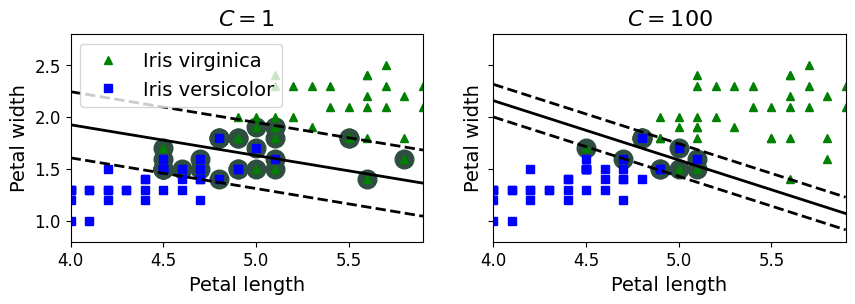

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#2e4e3f') #TMI? SSKU Color
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

##########################################################

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

# Standardization
scaler = StandardScaler()
# if your SVM model is overfitting, you can try regularizing it by reducing C
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])


#### B. SVM: Kernel Trick

##### Dimension Reduction using PCA! (4 -> 2)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, iterated_power=1)
train_reduced = pca.fit_transform(X_train_std)

##### Help Functions

In [ ]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

##### kernel='linear'

In [ ]:
from sklearn import svm


svcModel=svm.SVC(kernel='linear', C=1)

svcModel.fit(train_reduced, y_train)

predicted=svcModel.predict(train_reduced)

accuracy = svcModel.score(train_reduced, y_train)

X0, X1 = train_reduced[:, 0], train_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(plt, svcModel, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('SVC with linear kernel'+ '\n' + 'Accuracy:%.2f'%accuracy)

#####  kernel='poly'

In [ ]:
from sklearn import svm

polyModel=svm.SVC(kernel='poly', degree=3, gamma='auto', C=1)

polyModel.fit(train_reduced, y_train)

predicted=polyModel.predict(train_reduced)

accuracy = polyModel.score(train_reduced, y_train)

X0, X1 = train_reduced[:, 0], train_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(plt, polyModel, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('SVC with polynomial (degree 3) kernel'+ '\n' + 'Accuracy:%.2f'%accuracy)

##### kernel='rbf'

In [ ]:
from sklearn import svm

rbfModel=svm.SVC(kernel='rbf', gamma=0.7, C=1)

rbfModel.fit(train_reduced, y_train)

predicted=rbfModel.predict(train_reduced)

accuracy = rbfModel.score(train_reduced, y_train)

X0, X1 = train_reduced[:, 0], train_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(plt, rbfModel, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('SVC with RBF kernel'+ '\n' + 'Accuracy:%.2f'%accuracy)

---
## 3rd Assignment (Due: 4/07, 23:59)

### Write your K-means clustering code using Scikit-Learn for the wine dataset.

### **Information about Wine dataset**
#### https://archive.ics.uci.edu/dataset/109/wine
#### https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

### Then, submit your solutions with source code via i-Campus.
#### 1) outputs: taking a screenshot of the outputs -> converting it into a PDF file
#### 2) source code (.ipynb)




In [ ]:
# Write your code here!